In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [7]:
#Create your df here:
df = pd.read_csv(r"C:\Users\yousi\Documents\GitHub\Portfolio\Data Science\Portfolio Projects\OkCupid KNN Classification\profiles.csv")

#print(df.head())
#Question I want to answer: Can we classify whether or not someone does drugs based on their drinking, their sex, and their diet? 

In [8]:
#Transforming Drugs Data into Numerical Values 
drugs_dict = {"never":0,"sometimes":1 ,"often":2}
drinks_dict = {"socially":0, "rarely": 1,"often":2,"not at all": 3, "very often": 4, "desperately":5}
sex_dict = {"m":0, "f":1}
df["drugs_code"] = df.drugs.map(drugs_dict)
df["drinks_code"] = df.drinks.map(drinks_dict)
df["sex_code"] = df.sex.map(sex_dict)
df["clean_drinks_code"] = df["drinks_code"].fillna(0)
df["clean_drugs_code"] = df["drugs_code"].fillna(0)
df["clean_sex_code"] = df["sex_code"].fillna(0)
#creating the eventual feature and label data columns with imputation 
drug_use = df[["clean_drugs_code"]]
feature_data = df[["clean_drinks_code", "clean_sex_code"]]

In [9]:
training_data, validation_data, training_labels, validation_labels = train_test_split(feature_data,drug_use , test_size = 0.2, random_state = 100)
accuracies = [ ]
training_labels = training_labels.values.ravel()
validation_labels = validation_labels.values.ravel()
classifier = KNeighborsClassifier(n_neighbors = 80)
classifier.fit(training_data, training_labels)

print(classifier.score(validation_data, validation_labels))

0.8660550458715597


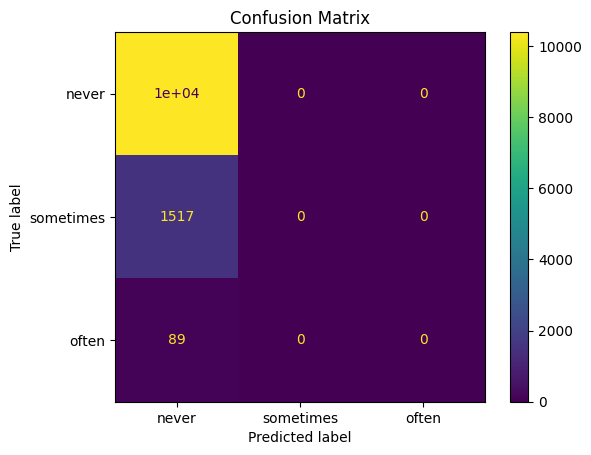

In [11]:
#Good score, let's visualise some stuff. 

predictions = classifier.predict(validation_data)

# Generate confusion matrix
cm = confusion_matrix(validation_labels, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["never", "sometimes", "often"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()